# Define scene collections

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# - - - - - - - - - - - - - - - - - - - - 
# DEFAULT IMPORTS - IN ALL NOTEBOKS
from src import configs

prjconf = configs.ProjectConfigParser()

# - - - - - - - - - - - - - - - - - - - - 
# NOTEBOOK SPECIFIC IMPORTS
import numpy as np
from pathlib import Path
import pandas as pd
import rasterio
from tqdm import tqdm 

import nasa_hls

## Select scenes for a scene collection

### Query parameters

In [3]:
# used to pre-select scenes by info contained in filenames 
product = "L30"
tile = "32UNU"
year = 2018
# derived from hdf metadata 
max_cloud_cover = 75
min_spatial_coverage = 0

### Create scene collection dataframe

Potential scenes.

In [4]:
hdf_paths = list(prjconf.get_path("Raw", "hls").glob(f"*.{product}.T{tile}.{year}*.hdf"))
df_scenes = nasa_hls.utils.dataframe_from_hdf_paths(hdf_paths, add_cloud_spatial_coverages=True)
df_scenes.head(2)

,path,sceneid,product,tile,date_Yj,date,cloud_cover,spatial_coverage
0,/home/ben/Devel/Projects/classify-hls/data/raw...,HLS.L30.T32UNU.2018035.v1.4,L30,T32UNU,2018035,2018-02-04,86.0,100.0
1,/home/ben/Devel/Projects/classify-hls/data/raw...,HLS.L30.T32UNU.2018346.v1.4,L30,T32UNU,2018346,2018-12-12,95.0,40.0


Scenes to be removed due to cloud cover or spatial coverage thresholds.

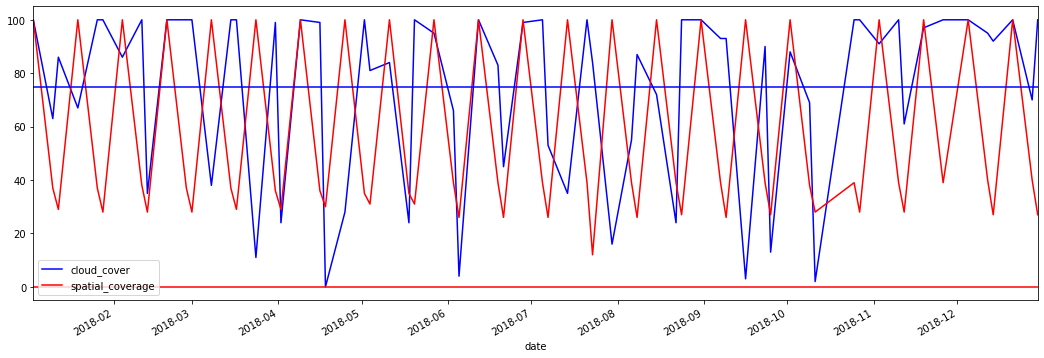

In [5]:
ax = df_scenes.plot(x="date", y="cloud_cover", color='b', figsize=(18, 6))
ax = df_scenes.plot(x="date", y="spatial_coverage", color='r', ax=ax)
ax.axhline(y=min_spatial_coverage, color='r')
ax.axhline(y=max_cloud_cover, color='b')

Create a scene collection.

In [14]:
scenecollection = df_scenes[(df_scenes.cloud_cover < max_cloud_cover) &  \
                            (df_scenes.spatial_coverage > min_spatial_coverage)] \
    .reset_index(drop=True) \
    .drop("path", axis=1) \
    .sort_values(["product", "date", "cloud_cover"])

display(scenecollection.head())

print(f"Number of scenes in the scene collection: {len(scenecollection)}")

,sceneid,product,tile,date_Yj,date,cloud_cover,spatial_coverage
6,HLS.L30.T32UNU.2018010.v1.4,L30,T32UNU,2018010,2018-01-10,63.0,37.0
16,HLS.L30.T32UNU.2018019.v1.4,L30,T32UNU,2018019,2018-01-19,67.0,100.0
0,HLS.L30.T32UNU.2018044.v1.4,L30,T32UNU,2018044,2018-02-13,35.0,28.0
23,HLS.L30.T32UNU.2018067.v1.4,L30,T32UNU,2018067,2018-03-08,38.0,100.0
5,HLS.L30.T32UNU.2018083.v1.4,L30,T32UNU,2018083,2018-03-24,11.0,100.0


Number of scenes in the scene collection: 24


Write a scene collection.

**Note** that for your own safety this throws an error if it exists.

In [16]:
scenecoll_name = f"scenecoll01__tile-{tile}_year-{year}_product-{product}_maxcc-{max_cloud_cover}_minsc-{min_spatial_coverage}"
prjconf.write_scene_collection(scenecollection, scenecoll_name)

 Scene collection written to /home/ben/Devel/Projects/classify-hls/data/interim/scene_collections/scenecoll01__tile-32UNU_year-2018_product-L30_maxcc-75_minsc-0.csv


And then you can read it simply by the name itself.

In [17]:
prjconf.read_scene_collection(scenecoll_name)

,sceneid,product,tile,date_Yj,date,cloud_cover,spatial_coverage
0,HLS.L30.T32UNU.2018010.v1.4,L30,T32UNU,2018010,2018-01-10,63.0,37.0
1,HLS.L30.T32UNU.2018019.v1.4,L30,T32UNU,2018019,2018-01-19,67.0,100.0
2,HLS.L30.T32UNU.2018044.v1.4,L30,T32UNU,2018044,2018-02-13,35.0,28.0
3,HLS.L30.T32UNU.2018067.v1.4,L30,T32UNU,2018067,2018-03-08,38.0,100.0
4,HLS.L30.T32UNU.2018083.v1.4,L30,T32UNU,2018083,2018-03-24,11.0,100.0
5,HLS.L30.T32UNU.2018092.v1.4,L30,T32UNU,2018092,2018-04-02,24.0,29.0
6,HLS.L30.T32UNU.2018108.v1.4,L30,T32UNU,2018108,2018-04-18,0.0,30.0
7,HLS.L30.T32UNU.2018115.v1.4,L30,T32UNU,2018115,2018-04-25,28.0,100.0
8,HLS.L30.T32UNU.2018138.v1.4,L30,T32UNU,2018138,2018-05-18,24.0,35.0
9,HLS.L30.T32UNU.2018154.v1.4,L30,T32UNU,2018154,2018-06-03,66.0,39.0


And to get all names of stored scene collections: 

In [18]:
prjconf.get_scene_collection_names()

['scenecoll01__tile-32UNU_year-2018_product-L30_maxcc-75_minsc-0']